# Numpy and Images
Images are pixel arrays and thus Numpy can be used to manipulate images.

## Load image
We use library __imageio__ to load logo PNG file and display image. Function [imread](https://imageio.readthedocs.io/en/v2.16.1/_autosummary/imageio.imread.html) returns images as a Numpy array.

/tmp/ipykernel_225986/2927863266.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('../../imgs/starwit.png')


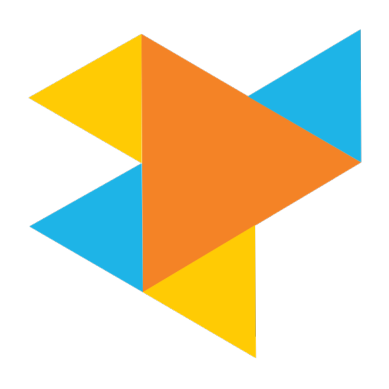

In [2]:
import imageio
import matplotlib.pyplot as plt
# Reading the image
img = imageio.imread('../../imgs/starwit.png') 
# Displaying the image
plt.imshow(img)
plt.axis('off')
plt.show() 


# Grayscale
Following code converts image into grayscale. This is possible as from now on, we can work on a Numpy array.

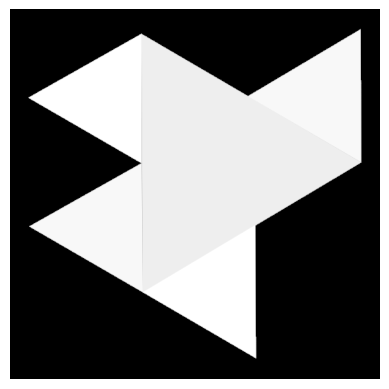

In [3]:
gray_img = img.mean(axis=2)
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()

# Find edges

With gray scale images it is much easier to detect edges. Following code uses SciPy's [convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html) function which runs a [Sobel](https://en.wikipedia.org/wiki/Sobel_operator) kernel (provided as another Numpy array) over a 2-dimensional array. Gist of this operation is to detect rapid changes in intensity.

Next step is to use function [hypot](https://numpy.org/doc/stable/reference/generated/numpy.hypot.html) from Numpy library to compute array with edges.

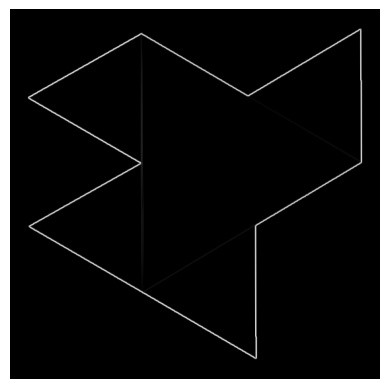

In [5]:
from scipy import ndimage
import numpy as np

# Sobel kernels
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Apply Sobel operator
out_x = ndimage.convolve(gray_img, sobel_x)
out_y = ndimage.convolve(gray_img, sobel_y)

# Calculate magnitude of gradients
edge_img = np.hypot(out_x, out_y)
plt.imshow(edge_img, cmap='gray')
plt.axis('off')
plt.show()